* userID 사용자의 고유번호
* assessmentItemID 문항의 고유번호
* testId 시험지의 고유번호
* answerCode 사용자가 해당 문항을 맞췄는지 여부에 대한 이진 데이터
* Timestamp 사용자가 해당문항을 풀기 시작한 시점의 데이터
* KnowledgeTag 문항 당 하나씩 배정되는 태그

<<< train dataset 간단한 EDA >>>

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv("/opt/ml/dkt_team/data/train_data.csv")
df.sample(5)

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
459998,640,A020115002,A020000115,1,2020-09-16 06:10:08,8006
1093488,1664,A030046001,A030000046,1,2020-04-13 10:11:20,373
2194904,5703,A020124005,A020000124,1,2020-09-28 14:37:17,8018
46621,61,A080111007,A080000111,1,2020-10-24 06:36:47,2711
1233353,1945,A080016004,A080000016,0,2020-04-14 03:45:05,4669


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2266586 entries, 0 to 2266585
Data columns (total 6 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   userID            int64 
 1   assessmentItemID  object
 2   testId            object
 3   answerCode        int64 
 4   Timestamp         object
 5   KnowledgeTag      int64 
dtypes: int64(3), object(3)
memory usage: 103.8+ MB


In [115]:
df.describe()

,userID,answerCode,KnowledgeTag
count,2.266586e+06,2.266586e+06,2.266586e+06
mean,2.087687e+03,6.543784e-01,4.909007e+03
std,1.589365e+03,4.755706e-01,3.302214e+03
min,0.000000e+00,0.000000e+00,2.300000e+01
25%,8.000000e+02,0.000000e+00,1.931000e+03
50%,1.748000e+03,1.000000e+00,5.258000e+03
75%,3.046000e+03,1.000000e+00,7.913000e+03
max,7.441000e+03,1.000000e+00,1.127100e+04


In [116]:
# 각 컬럼의 고유값
columns = df.columns
for column in columns:
    print(f'{column} : {df[column].unique()}')

userID : [   0    1    2 ... 7438 7440 7441]
assessmentItemID : ['A060001001' 'A060001002' 'A060001003' ... 'A010180004' 'A010180005'
 'A010180006']
testId : ['A060000001' 'A060000003' 'A060000005' ... 'A010000178' 'A010000189'
 'A010000180']
answerCode : [1 0]
Timestamp : ['2020-03-24 00:17:11' '2020-03-24 00:17:14' '2020-03-24 00:17:22' ...
 '2020-08-21 01:06:50' '2020-08-21 01:07:36' '2020-08-21 01:08:49']
KnowledgeTag : [ 7224  7225  7226  7227  7228  7229  4605  1394  1396  1397  1395  7230
   586   587  1356  4657   588   589   590  4658  4673  1444  4661  1443
  4660  4659  1442   592   593  4671  4668  4664  4663  4662  4665  4669
  4672   595   594  4667   596   599   598   600  4678  4682  4681  4680
   601  4685   602  4683  4684  9232   603  2652  4686  7863   606   605
   609  4687   610  4805  4688   611 10603   612  4784  4802  4795 10604
   614  4803  4793  4797  9557   615   616  2848   618  4783  4801  4799
 10605 10606  9590  2849  2852  2853  4804 10403 10405   623 

In [117]:
# 각 컬럼의 고유값 개수
columns = df.columns
for column in columns:
    print(f'{column} : {df[column].nunique()}')

userID : 6698
assessmentItemID : 9454
testId : 1537
answerCode : 2
Timestamp : 2076774
KnowledgeTag : 912


In [118]:
df['userID'].unique()

array([   0,    1,    2, ..., 7438, 7440, 7441])

<AxesSubplot: >

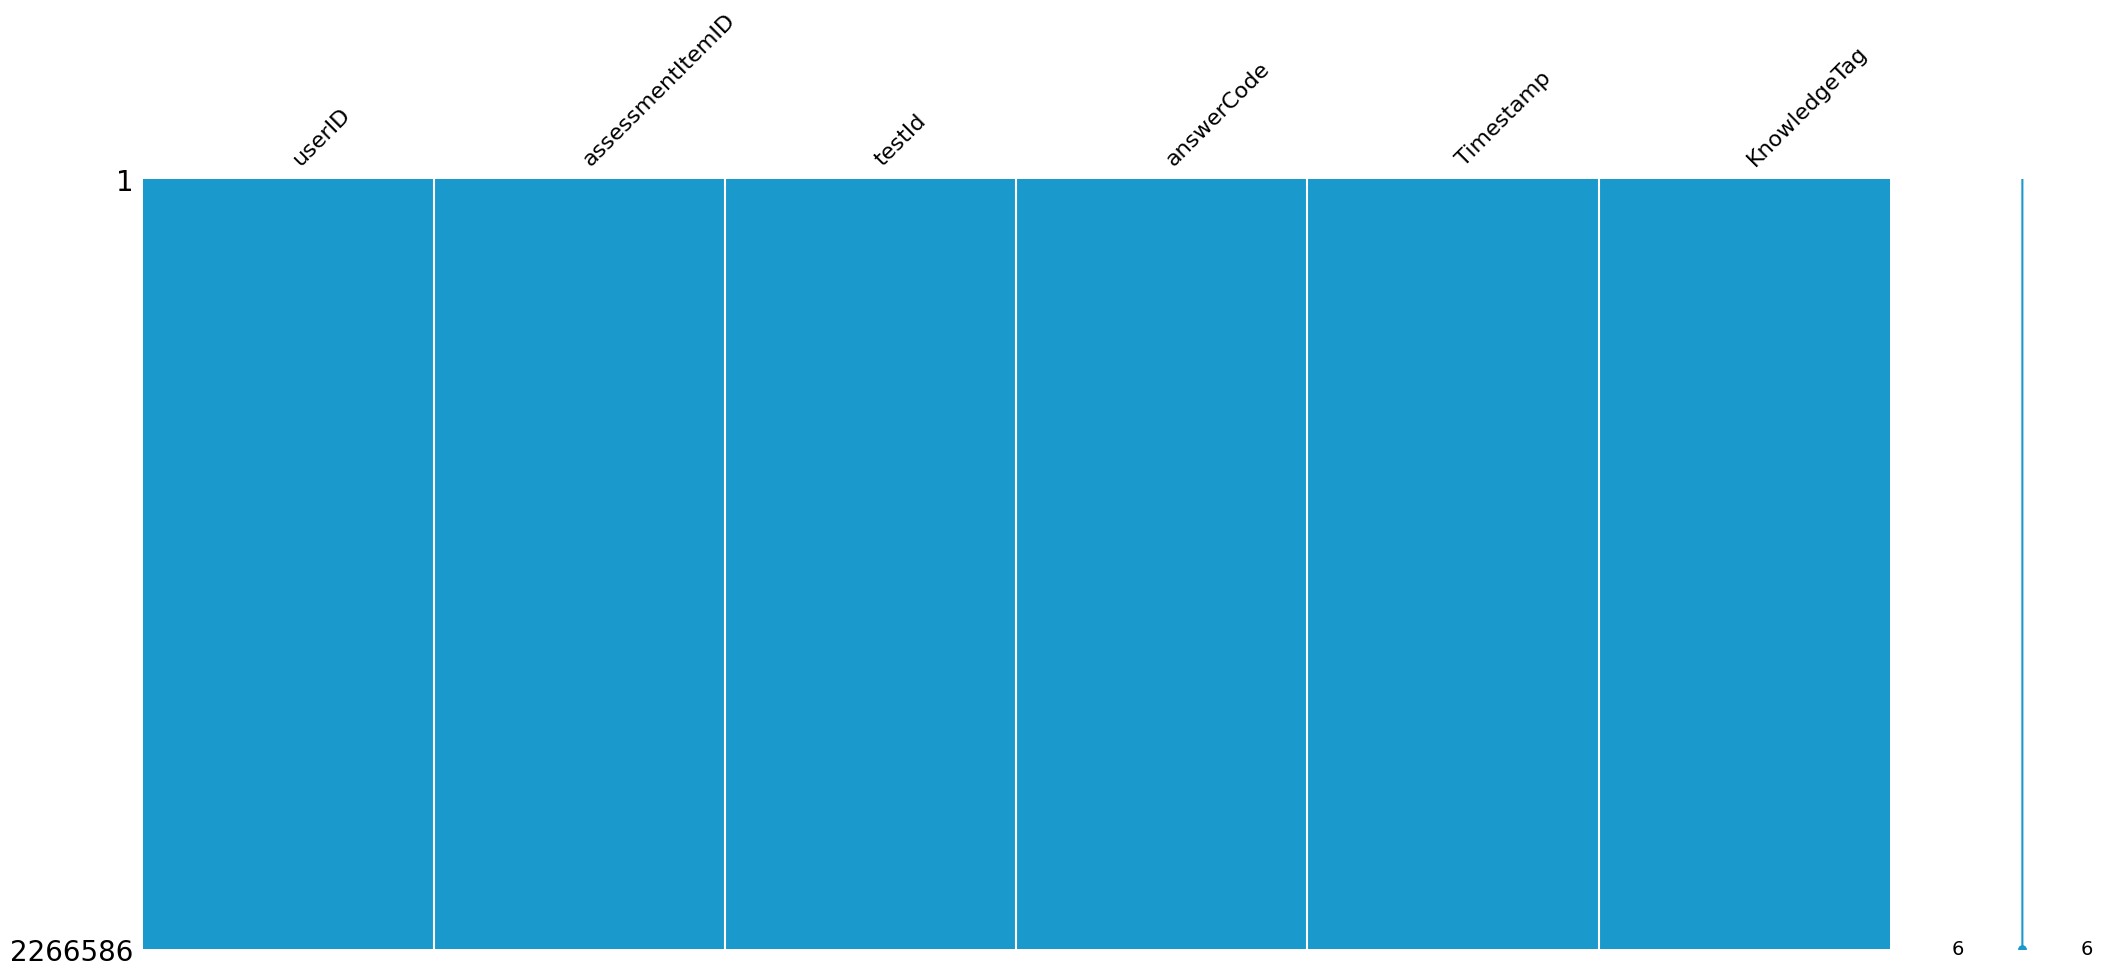

In [119]:
import missingno as msno
msno.matrix(df=df.iloc[:, :], color=(0.1, 0.6, 0.8))

In [120]:
# 각 컬럼의 결측값 개수 -> 결측치 없음
columns = df.columns
for column in columns:
    print(f'{column} : {df[column].isna().sum()}')

userID : 0
assessmentItemID : 0
testId : 0
answerCode : 0
Timestamp : 0
KnowledgeTag : 0


1    1483205
0     783381
Name: answerCode, dtype: int64


<AxesSubplot: >

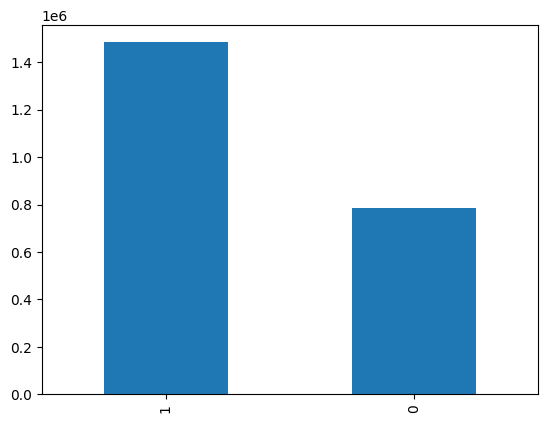

In [121]:
# 정답과 오답의 비율
df_answerCode = df['answerCode'].value_counts()
print(df_answerCode)
df_answerCode.plot(kind='bar')

7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: KnowledgeTag, Length: 912, dtype: int64


<AxesSubplot: >

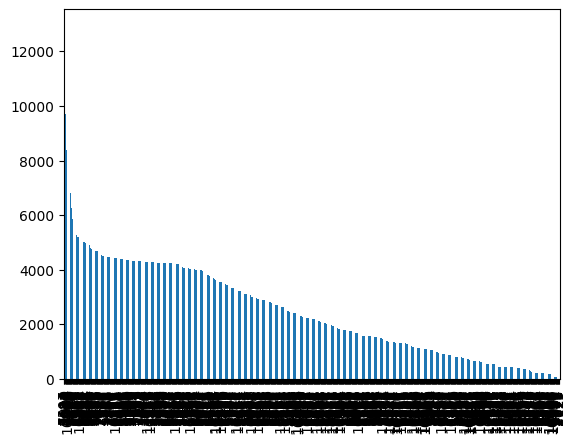

In [122]:
df_tag = df['KnowledgeTag'].value_counts()
print(df_tag)
df_tag.plot(kind='bar')

df2 <- df에서 대분류 추가 후, 대분류와 중분류 특징 관찰

In [123]:
df2 = df.copy()
df2.head()

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225


In [124]:
df2['test_tag'] = df2['testId'].apply(lambda x: x[2:3])

In [125]:
df2['test_tag'].unique()

array(['6', '8', '2', '4', '9', '3', '5', '1', '7'], dtype=object)

<AxesSubplot: >

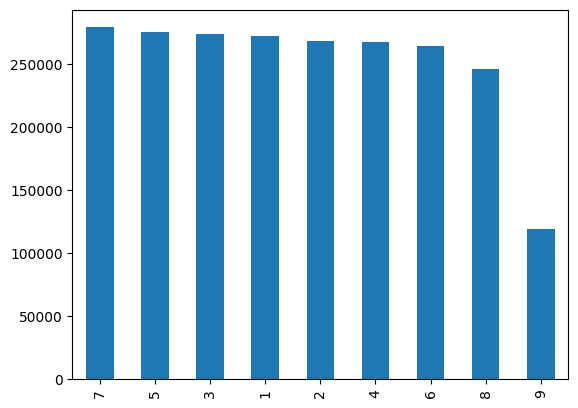

In [126]:
df2['test_tag'].value_counts().plot(kind='bar')

df2에 test_tag로 대분류 feature를 추가하고 데이터 개수를 비교해주자
7이 제일 많고 9가 제일 적은 것은 것을 볼 수 있다.

In [127]:
def percentile(s):
    return np.sum(s) / len(s)

<AxesSubplot: xlabel='test_tag'>

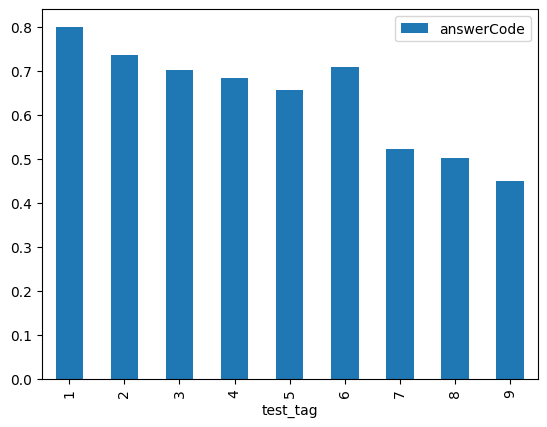

In [128]:
df2.groupby('test_tag').agg({
    'answerCode' : percentile
}).plot(kind='bar')

test_tag 대분류로 그룹핑해서 정답률을 확인해주었을 때, 대분류 별로 유의미한 차이가 있음을 볼 수 있다.
-> 대분류로 feature 추가 고려해보자

<AxesSubplot: xlabel='KnowledgeTag'>

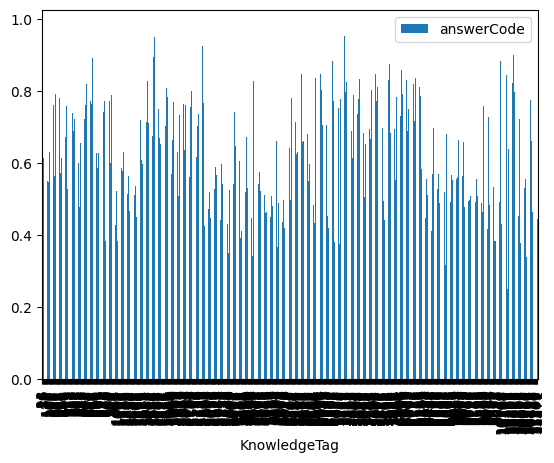

In [129]:
df2.groupby('KnowledgeTag').agg({
    'answerCode' : percentile
}).plot(kind='bar')

In [130]:
df2[df2['KnowledgeTag'] == 0]

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,test_tag


In [131]:
tag_high_df = pd.DataFrame(df2['KnowledgeTag'].value_counts()).reset_index()
tag_high_df.columns = ['KnowledgeTag','count']
tag_high_df.head(10)

,KnowledgeTag,count
0,7597,12892
1,7600,10734
2,2010,10176
3,7621,9709
4,8127,9006
5,8004,8394
6,2085,8247
7,10169,8180
8,2065,7945
9,7599,7231


문항 ID와 tag 가 관련이 있을까?

In [132]:
sorted(df2['assessmentItemID'].apply(lambda x:x[-3:]).unique())

['001',
 '002',
 '003',
 '004',
 '005',
 '006',
 '007',
 '008',
 '009',
 '010',
 '011',
 '012',
 '013']

In [133]:
temp = df2['assessmentItemID'].apply(lambda x:x[-6:-3]).unique()
temp.sort()
temp

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '094', '095', '096', '097', '098', '099',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128',

문항ID의 뒤 세자리 숫자는 1~13번까지... 한 시험지 당 13번까지만 있나보다.
문항ID의 숫자 가운데 세자리 숫자는 1~198번까지... 무슨 상관이 있을까!

문항 ID를 다시 정리하면,
앞의 첫자리는 무조건 A.
그 다음 세자리는 1~9로 대분류 feature로 나눴던 세자리.
그 다음 세자리는 1~198까지의 무언가.
마지막 세자리는 시험지 내 문항 번호로 1~13까지.


In [182]:
tag_group = df2.groupby(['test_tag', 'KnowledgeTag']).agg({
    'answerCode' : percentile
})

In [187]:
tag_group = tag_group.reset_index()

/tmp/ipykernel_38919/2178446056.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(tag_group.pivot('test_tag','KnowledgeTag', 'answerCode'))


<AxesSubplot: xlabel='KnowledgeTag', ylabel='test_tag'>

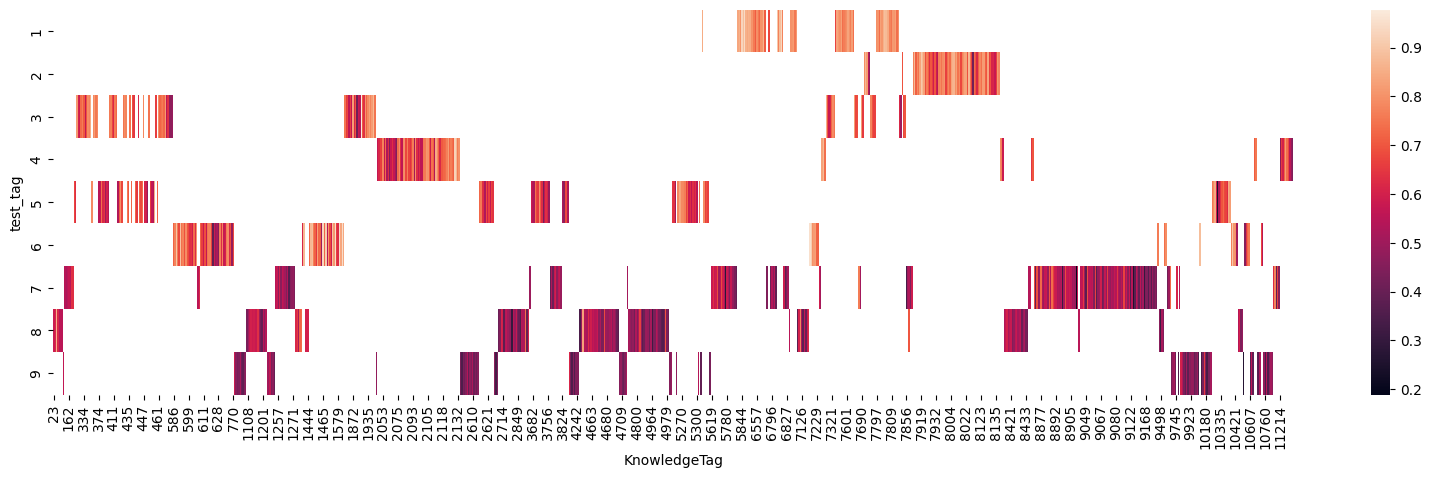

In [192]:
plt.figure(figsize=(20,5))
sns.heatmap(tag_group.pivot('test_tag','KnowledgeTag', 'answerCode'))

대분류와 중분류 크로스탭 결과 분석
-> 중분류가 특정 대분류에만 포함되어 있는 것을 알 수 있었음.

In [135]:
cross_tag = pd.crosstab(df2['test_tag'], df2['KnowledgeTag'], margins=False)
cross_tag

KnowledgeTag,23,24,25,26,30,31,32,78,116,117,...,11214,11235,11236,11241,11246,11253,11265,11269,11270,11271
test_tag,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,4219,542,537,531,1476,4282,454,2417,261,522
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1328,1807,...,0,0,0,0,0,0,0,0,0,0
8,1800,358,92,2432,539,1123,4282,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,1581,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
df2['test_tag'].value_counts()

7    279164
5    275773
3    273762
1    272082
2    268327
4    267323
6    264434
8    246336
9    119385
Name: test_tag, dtype: int64

In [138]:
df2['KnowledgeTag'].value_counts()

7597    12892
7600    10734
2010    10176
7621     9709
8127     9006
        ...  
5142       47
2871       46
4978       46
7125       45
2613       44
Name: KnowledgeTag, Length: 912, dtype: int64

In [155]:
df2[df2['test_tag'] == '1']['KnowledgeTag'].nunique()

64

In [150]:
df2[df2['test_tag'] == '8']['KnowledgeTag'].nunique()

150

In [159]:
set1 = df2[df2['test_tag'] == '1']['KnowledgeTag'].unique()
set8 = df2[df2['test_tag'] == '8']['KnowledgeTag'].unique()

In [162]:
list(set(set1).intersection(set8))

[]

In [163]:
list(set(set8).intersection(set1))

[]

In [256]:
df2

,userID,assessmentItemID,testId,answerCode,Timestamp,KnowledgeTag,test_tag
0,0,A060001001,A060000001,1,2020-03-24 00:17:11,7224,6
1,0,A060001002,A060000001,1,2020-03-24 00:17:14,7225,6
2,0,A060001003,A060000001,1,2020-03-24 00:17:22,7225,6
3,0,A060001004,A060000001,1,2020-03-24 00:17:29,7225,6
4,0,A060001005,A060000001,1,2020-03-24 00:17:36,7225,6
...,...,...,...,...,...,...,...
2266581,7441,A030071005,A030000071,0,2020-06-05 06:50:21,438,3
2266582,7441,A040165001,A040000165,1,2020-08-21 01:06:39,8836,4
2266583,7441,A040165002,A040000165,1,2020-08-21 01:06:50,8836,4
2266584,7441,A040165003,A040000165,1,2020-08-21 01:07:36,8836,4


대분류 test_tag 1과 대분류 test_tag 8의 중분류가 서로 겹치지 않는 것을 확인했다.
그럼 test_tag 대분류 따라 중분류가 겹치지 않는 것인가?

In [171]:
sets = []
for i in range(1, 10):
    sets.append(df2[df2['test_tag'] == str(i)]['KnowledgeTag'].unique())
    

In [173]:
for i in range(0, 8):
    print(list(set(sets[i]).intersection(sets[s]) for s in range(i+1, len(sets))))

[set(), set(), set(), set(), set(), set(), set(), set()]
[set(), set(), set(), set(), set(), set(), set()]
[set(), set(), set(), set(), set(), set()]
[set(), set(), set(), set(), set()]
[set(), set(), set(), set()]
[set(), set(), set()]
[{7863}, set()]
[set()]


In [176]:
print(f'sets 6 : {sorted(sets[6])}')
print(f'sets 7 : {sorted(sets[7])}')

sets 6 : [116, 117, 121, 162, 163, 164, 169, 607, 608, 1255, 1256, 1257, 1259, 1260, 1261, 1262, 1263, 1264, 1266, 1267, 1268, 1269, 1271, 1273, 3288, 3792, 3793, 3794, 3795, 3798, 3804, 3806, 3820, 3821, 4746, 5619, 5620, 5653, 5654, 5655, 5656, 5705, 5707, 5761, 5762, 5763, 5780, 5781, 5782, 5783, 5788, 5808, 5809, 5810, 6784, 6785, 6795, 6796, 6800, 6801, 6802, 6825, 6826, 6827, 6828, 7248, 7259, 7665, 7667, 7856, 7862, 7863, 7866, 7867, 8830, 8831, 8868, 8871, 8872, 8874, 8875, 8877, 8878, 8879, 8880, 8881, 8885, 8886, 8887, 8889, 8890, 8891, 8892, 8893, 8894, 8895, 8896, 8897, 8899, 8900, 8901, 8902, 8904, 8905, 8906, 8908, 8910, 8911, 8913, 9021, 9022, 9044, 9046, 9049, 9050, 9051, 9052, 9053, 9054, 9055, 9062, 9064, 9065, 9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9075, 9077, 9078, 9079, 9080, 9081, 9082, 9083, 9086, 9090, 9091, 9098, 9099, 9120, 9121, 9122, 9124, 9125, 9126, 9160, 9161, 9162, 9164, 9165, 9166, 9167, 9168, 9169, 9170, 9171, 9172, 9184, 9185, 9186, 9187, 959

In [177]:
list(set(sets[6]).intersection(sets[7]))
# 왜 이것만 둘다 포함되지?!!

[7863]

타임스탬프 분석해보자
- 총 걸린 시간 feature로 추가
- 낮에 풀었는지 밤에 풀었는지
- 푼 시간을 나누어 크게 분류해보자

In [197]:
from datetime import datetime
import time

In [232]:
time_df = df.copy()

In [233]:
time_df['Timestamp'] = pd.to_datetime(time_df['Timestamp'])

In [ ]:
time_df.groupby('userID')['Timestamp']

In [226]:
time_df['hour'] = time_df['Timestamp'].transform(lambda x: pd.to_datetime(x).dt.hour)


<AxesSubplot: >

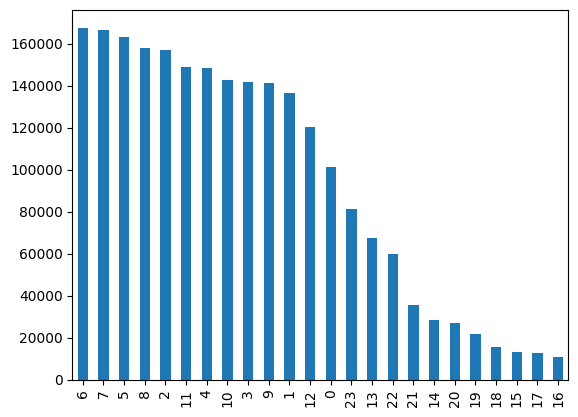

In [231]:
time_df['hour'].value_counts().plot(kind='bar')